# Лабораторная работа: Divide&Conquer
#  Алгоритм QuickHull поиска выпуклой оболочки
# Выполнили: Залесская Галина, Елькина Варвара

In [1]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

In [2]:
points = []
n_points = 100
for i in range(n_points):
    x = randint(0,20)
    y = randint(0,20)
    point = [x,y]
    points.append(point)

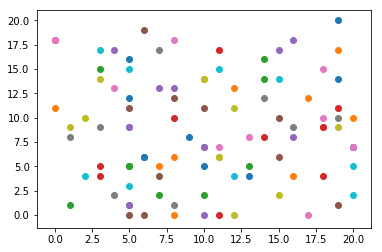

In [3]:
plt.figure()
for p in points:
    plt.scatter(p[0],p[1])
plt.show()

In [4]:
POINTS = points

In [5]:
#функция, которая определяет расстояние от точки, до линии, образованной 2 точками 
def lineDist(p1,p2,p):
    return abs((p[1]-p1[1]) * (p2[0]-p1[0]) - (p2[1] - p1[1]) * (p[0]-p1[0]))

In [6]:
# когда flag=1, алгоритм движется наверх, когда 0 - вниз
# еcли расстояние до точки =0, то вернем 1, то есть считаем, что точка находится во внешней области. 
# Она может быть частью выпуклой оболочки, так что добавим ее в список для последующей обработки.
def lineSide(p1,p2,p,flag=1):
    dist = (p[1]-p1[1]) * (p2[0]-p1[0]) - (p2[1] - p1[1]) * (p[0]-p1[0])
    if (flag*dist >= 0):
        return 1
    else:
        return -1

In [7]:
def quickHullMain(points):
    print("Зеленые точки - обрабатываемые на данной итерации точки")
    x_min = [1000, 0]
    x_max = [-1000,0]
    points_up = []
    points_down = []
    
    for p in points:
        if (p[0]<x_min[0]):
            x_min = p
        if (p[0]>x_max[0]):
            x_max = p
            
    hull.append(x_min)
    hull.append(x_max)           

    for p in points:
        if ((p!=x_min) and (p!=x_max)): #точки, образующие разделяющие линии, больше не обрабатываются
            if (lineSide(x_min, x_max, p)==1):
                points_up.append(p)
            else:
                points_down.append(p)

    quickHull(points_up, x_min, x_max, flag=1) #flag=1 - движемся вверх
    quickHull(points_down, x_min, x_max, flag=-1) #flag=0 - движемся вниз

In [8]:
def quickHull(points, p1, p2, flag):
    max_dist = 0
    P=0
    left_points = []
    right_points = []
    for p in points:
        if (lineDist(p1,p2,p)>max_dist):
            P=p
            max_dist = lineDist(p1,p2,p)
    if ((P==0) or (max_dist==0)): 
        #если все обрабатываемые точки на одной линии, то они являются частью выпуклой оболочки 
        #и все они добавляются в список вершин выпуклой оболочки
        for p in points:
            hull.append(p)
        return
    hull.append(P) #добавляем самую дальнюю точку к выпуклой оболочке
    
    #этот блог был написан во время дебага, но он классный и наглядный, не хотелось его убирать
    plt.figure()
    for i in range(n_points):
        plt.scatter(POINTS[i][0],POINTS[i][1], c="black")
    for p in points:
        plt.scatter(p[0],p[1], c="green")
    for h in hull:
        plt.scatter(h[0],h[1], c="red")
    plt.plot([p1[0],P[0],p2[0]],[p1[1],P[1],p2[1]], 'black' )
    plt.show()
    
    for p in points:
        if (p!=P): #самая дальняя точка уже часть оболочки и больше не обрабатывается 
            if (p[0] <= P[0]): 
                #выбираем, относительно какой из двух образованных линий высчитывается внутренняя и внешняя область
                if (lineSide(p1,P,p,flag)==1):
                    left_points.append(p)
            if (p[0] >= P[0]):
                if (lineSide(P,p2,p,flag)==1):
                    right_points.append(p)

    quickHull(left_points, p1, P, flag)
    quickHull(right_points, P, p2, flag)
        

Зеленые точки - обрабатываемые на данной итерации точки


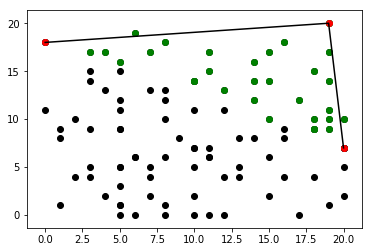

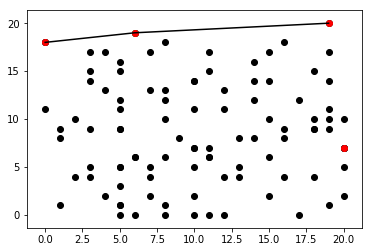

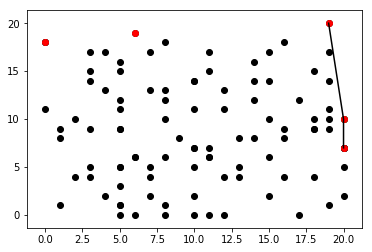

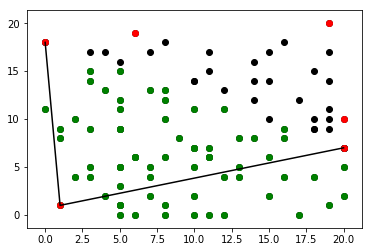

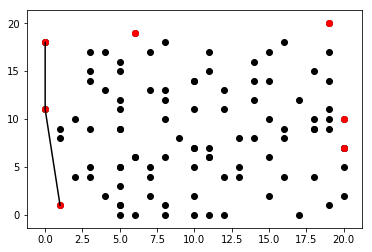

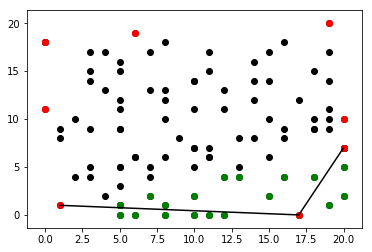

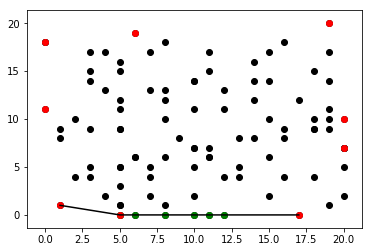

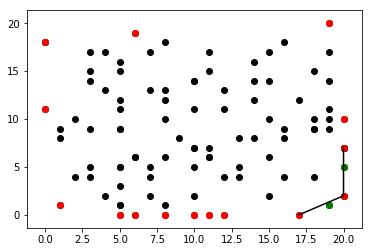

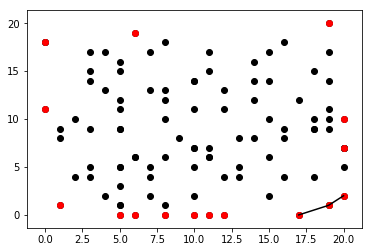

In [9]:
hull = [] #глобальные переменные это нехорошо, знаю
quickHullMain(points)

In [10]:
hull #вершины, составляющие выпуклую оболочку

[[0, 18],
 [20, 7],
 [19, 20],
 [6, 19],
 [20, 10],
 [1, 1],
 [0, 11],
 [17, 0],
 [5, 0],
 [12, 0],
 [11, 0],
 [10, 0],
 [6, 0],
 [8, 0],
 [20, 2],
 [19, 1],
 [20, 5]]

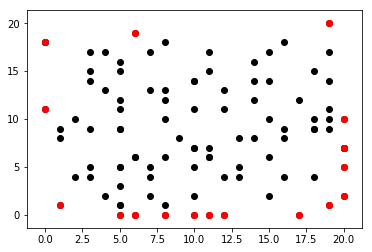

In [11]:
plt.figure()
#все точки
for p in POINTS:
    plt.scatter(p[0],p[1], c="black")
#точки выпуклой оболочки
for h in hull:
    plt.scatter(h[0],h[1], c="red")
plt.show()